In [1]:
from datetime import datetime, timedelta
import requests
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
# Connecting to finviz.com to scrape the data on Stock News
#base URL
finviz_url = 'https://finviz.com/quote.ashx?t='
#List of stocks to be analyzed
tickers = ['AMZN', 'GOOG', 'AAPL', 'JPM', 'JNJ', 'XOM', 'F', 'DIS', 'CVX', 'UL']

In [3]:
#Pulling the data 
news_tables = {}
for ticker in tickers:
    #creating the URL for the request
    url = finviz_url + ticker
    #request
    response = requests.get(url=url, headers={'user-agent': 'my_app'})
    #parsing using BeautifulSoup
    html = BeautifulSoup(response.text, 'html')
    #looking for 'news-table' (the table on the webpage containing the news)
    #store the table with the news in the variable news_table
    news_table = html.find(id='news-table')
    #adds a key(stock ticker) and a value (the news table) to the news_table dictionary
    news_tables[ticker] = news_table
   
#Find the news title in every table row    
parsed_data = []

for ticker, news_table in news_tables.items():
      #find all the <tr> - table row containing the news title
      for row in news_table.findAll('tr'):
                       
             #Find <a> tag (containing title of the article)  and extract the title        
             title = row.find('a')
             if title:
               title = title.text 
             #if there is no title print "No article found"  
             else:
                print("No article link found.")
             #Extract the date and time from the <td> tag
             date_data=[]
             date_data =row.find('td').get_text(strip=True).split(' ')
            
                                    
             if len(date_data) == 1:
                time = date_data[0]
             else:
                if date_data[0] == 'Today': 
                    date = datetime.now().date()
                    time = date_data[1]
                else:
                    date = date_data[0]
                    time = date_data[1]
             #Add the ticker, title, date, and time to the the parsed_data list
             parsed_data.append([ticker, date, time, title])
print (parsed_data)
print(len(parsed_data))
      

No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
[['AMZN', datetime.date(2024, 10, 16), '03:50PM', "AWS CEO on Amazon's $500 million small modular reactors investment"], ['AMZN', datetime.date(2024, 10, 16), '03:45PM', 'Nvidia is set to dominate another Big Tech earnings season'], ['AMZN', datetime.date(2024, 10, 16), '03:36PM', 'Jim Cramer on Amazon, Inc. 

In [4]:
#Creating a dataframe from the parsed_data list
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
#CLEANING THE DATA *************************************************** 
#1. Deleting the rows that don't contain a title
df = df.dropna(subset=['title'])
#Normalizing the date format
df['date'] = pd.to_datetime(df['date']).dt.date
#create a file with the data to inspect it
df.to_csv('parsed_data.csv')
df.head(10)



,ticker,date,time,title
0,AMZN,2024-10-16,03:50PM,AWS CEO on Amazon's $500 million small modular...
1,AMZN,2024-10-16,03:45PM,Nvidia is set to dominate another Big Tech ear...
2,AMZN,2024-10-16,03:36PM,"Jim Cramer on Amazon, Inc. (AMZN): I Think The..."
3,AMZN,2024-10-16,12:05PM,Amazon is joining Google and Microsoft in goin...
4,AMZN,2024-10-16,02:45PM,How to gain 'Magnificent Seven' exposure throu...
6,AMZN,2024-10-16,02:40PM,"Amazon, Google tap into nuclear power to fuel ..."
7,AMZN,2024-10-16,02:31PM,Amazon Joins Big Techs Foray Into Nuclear Power
8,AMZN,2024-10-16,02:22PM,The Future of Cars and Search
9,AMZN,2024-10-16,01:14PM,"Amazon Launches New Kindles, Including First C..."
10,AMZN,2024-10-16,01:05PM,Amazon doubles down on nuclear energy with dea...


In [5]:
#run the sentiment analysis on the titles 
vader = SentimentIntensityAnalyzer()
f = lambda title: vader.polarity_scores(title)['compound'] #if title is not None else None
df['score'] = df['title'].apply(f)
df.to_csv('scores.csv')
df.head(10)


,ticker,date,time,title,score
0,AMZN,2024-10-16,03:50PM,AWS CEO on Amazon's $500 million small modular...,0.0000
1,AMZN,2024-10-16,03:45PM,Nvidia is set to dominate another Big Tech ear...,-0.1280
2,AMZN,2024-10-16,03:36PM,"Jim Cramer on Amazon, Inc. (AMZN): I Think The...",0.6124
3,AMZN,2024-10-16,12:05PM,Amazon is joining Google and Microsoft in goin...,0.1779
4,AMZN,2024-10-16,02:45PM,How to gain 'Magnificent Seven' exposure throu...,0.8074
6,AMZN,2024-10-16,02:40PM,"Amazon, Google tap into nuclear power to fuel ...",0.1779
7,AMZN,2024-10-16,02:31PM,Amazon Joins Big Techs Foray Into Nuclear Power,0.1779
8,AMZN,2024-10-16,02:22PM,The Future of Cars and Search,0.0000
9,AMZN,2024-10-16,01:14PM,"Amazon Launches New Kindles, Including First C...",0.1779
10,AMZN,2024-10-16,01:05PM,Amazon doubles down on nuclear energy with dea...,0.4215


In [9]:
#Filter the news going back maximum 7 days
week_news_df = df[df['date'] >= (datetime.now().date() - timedelta(days = 7))]

#calculate the average score for each day, and store it in a dataframe
mean_df = week_news_df.groupby(['ticker', 'date']).mean('score')
mean_df = mean_df.unstack()
mean_df = mean_df.xs('score', axis='columns').transpose()

#export to file
mean_df.to_csv('sentiment_scores.csv')
#print the dataframe
mean_df.head(20)



ticker,AAPL,AMZN,CVX,DIS,F,GOOG,JNJ,JPM,UL,XOM
date,,,,,,,,,,
2024-10-09,NaN,NaN,0.320733,-0.021871,NaN,NaN,0.114380,NaN,NaN,0.273200
2024-10-10,NaN,NaN,0.000000,0.006450,0.273200,NaN,0.067914,0.329567,-0.07400,0.261717
2024-10-11,0.129773,0.265750,-0.013600,NaN,NaN,-0.203733,0.147020,0.114065,-0.08785,0.103775
2024-10-12,0.190333,0.091564,0.000000,0.000000,0.510600,0.188673,0.636900,0.094700,NaN,0.000000
2024-10-13,0.190025,0.252220,0.259975,NaN,0.227350,0.367775,0.000000,NaN,NaN,-0.136600
2024-10-14,0.203427,0.353969,NaN,0.313133,0.206800,0.158183,0.136000,0.226392,-0.36010,0.101150
2024-10-15,0.163126,0.114288,0.474025,-0.285950,0.198137,0.082525,0.076482,0.124570,NaN,0.179700
2024-10-16,0.136891,0.219166,0.310967,0.178625,0.000000,0.300804,0.044867,0.048036,NaN,0.218200


<Figure size 10000x5000 with 0 Axes>

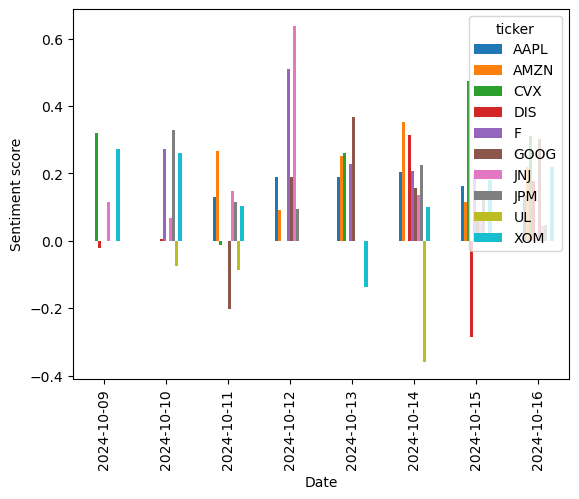

In [11]:
plt.figure(figsize=(100, 50))
mean_df.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.xticks(rotation=90)
plt.show()

